In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [8]:
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 10
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2,)

In [9]:
train_data = datagen.flow_from_directory("/content/drive/MyDrive/dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

Found 160 images belonging to 4 classes.


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
val_data = datagen.flow_from_directory(
    "/content/drive/MyDrive/dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 40 images belonging to 4 classes.


In [12]:
class_indices = train_data.class_indices
class_names = list(class_indices.keys())
num_classes = train_data.num_classes

print("Class Indices:", class_indices)
print("Class Names:", class_names)
print("Number of Classes:", num_classes)

Class Indices: {'prajan': 0, 'sankari': 1, 'sharan': 2, 'stuart': 3}
Class Names: ['prajan', 'sankari', 'sharan', 'stuart']
Number of Classes: 4


In [13]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu',
                  input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    # ✅ FIX: output neurons = number of classes
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    train_data,
    epochs=7,
    validation_data=val_data
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3043 - loss: 2.0349

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.3062 - loss: 2.0075 - val_accuracy: 0.2750 - val_loss: 1.3739
Epoch 2/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.4613 - loss: 1.1957 - val_accuracy: 0.5250 - val_loss: 1.1582
Epoch 3/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7023 - loss: 0.8806 - val_accuracy: 0.5750 - val_loss: 1.0393
Epoch 4/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7486 - loss: 0.5650 - val_accuracy: 0.6250 - val_loss: 1.1587
Epoch 5/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9571 - loss: 0.3017 - val_accuracy: 0.7250 - val_loss: 1.4475
Epoch 6/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9798 - loss: 0.0652 - val_accuracy: 0.6750 - val_loss: 1.2090
Epoch 7/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 1.0000 - loss: 0.0249 - val_accuracy: 0.7750 - val_loss: 2.0670


In [17]:
model.save('/content/drive/MyDrive/dataset.h5')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('/content/drive/MyDrive/face_recognition.h5')
print("Model Loaded Successfully")

Model Loaded Successfully


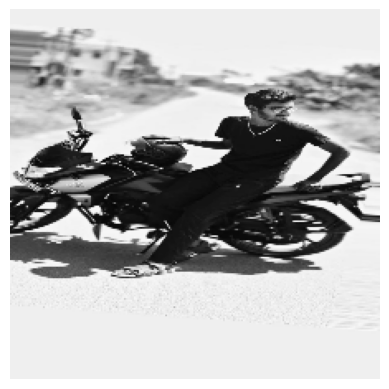

In [20]:
test_image_path = '/content/drive/MyDrive/aug_0_28.jpg'
img = image.load_img(test_image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
plt.axis('off') # Turn off axis for cleaner image display
plt.show()